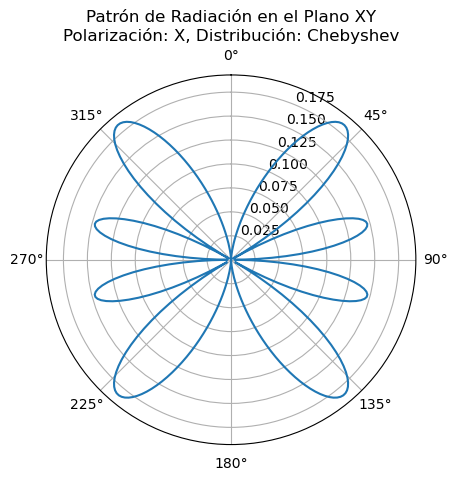

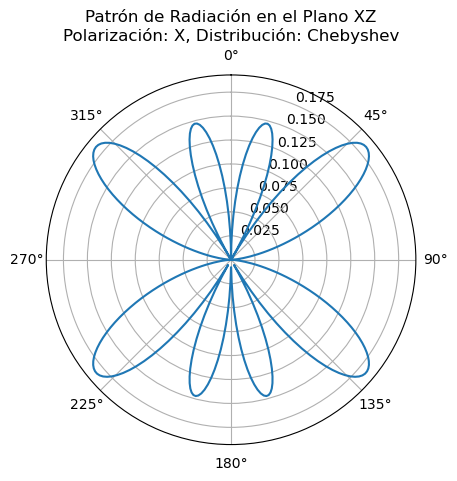

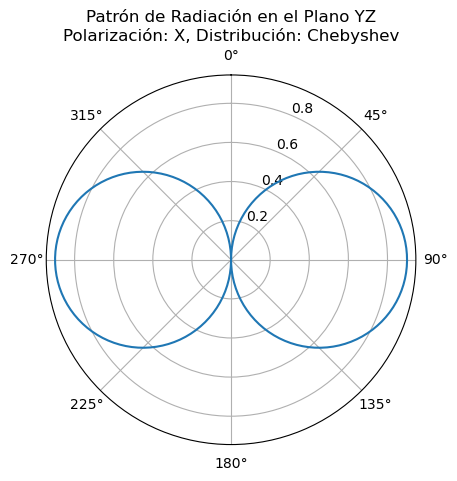

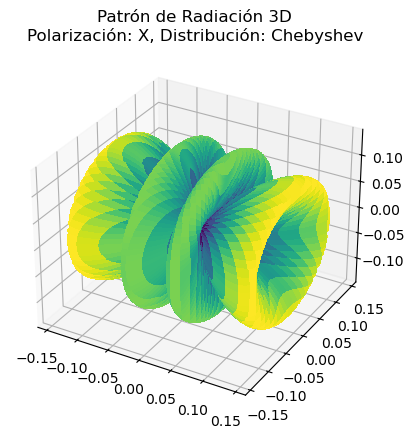

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros generales
f = 1e9  # Frecuencia en Hz (1 GHz)
c = 3e8  # Velocidad de la luz en m/s
lambda_0 = c / f  # Longitud de onda en metros
k = 2 * np.pi / lambda_0  # Número de onda
d_var = lambda_0 / 2  # Separación entre elementos (λ/2)
N = 4  # Número de elementos
eficiencia = 0.9  # Eficiencia de la antena (90%)
l_dipolo = 0.15  # Longitud del dipolo en metros (15 cm)

# Tipo de elemento: 'isotropico' o 'dipolo'
tipo_elemento = 'dipolo'  # Cambiar a 'isotropico' para fuentes puntuales

# Polarización: 'X', 'Y' o 'Z'
polarizacion = 'X'

# Distribución de amplitud: 'uniforme' o 'chebyshev'
distribucion = 'chebyshev'  # Cambiar a 'uniforme' para la distribución de amplitud uniforme

# Relación de lóbulo secundario (SLL) deseada para Chebyshev (en dB)
SLL_dB = 30  # 30 dB de lóbulo secundario

# Posiciones de los elementos en el eje X
n_array = np.arange(N)
x_n = (- (N - 1) / 2 + n_array) * d_var

# Función para calcular el patrón del elemento según la polarización
def patron_elemento(theta, phi, polarizacion):
    if polarizacion == 'X':
        return np.sin(theta) * np.cos(phi)
    elif polarizacion == 'Y':
        return np.sin(theta) * np.sin(phi)
    elif polarizacion == 'Z':
        return np.cos(theta)
    else:
        raise ValueError("Polarización no reconocida. Usar 'X', 'Y' o 'Z'.")

# Función para calcular los coeficientes de Chebyshev
def coeficientes_chebyshev(N, SLL_dB):
    # Convertir SLL de dB a lineal
    SLL_linear = 10 ** (SLL_dB / 20.0)
    
    # Coeficientes de Chebyshev
    coef = np.polynomial.chebyshev.chebval(np.cos(np.pi * np.arange(N) / (N - 1)), np.polynomial.chebyshev.chebfit(np.cos(np.pi * np.arange(N) / (N - 1)), np.ones(N), N - 1) / SLL_linear)
    
    # Normalizar coeficientes
    coef = np.abs(coef) / np.max(np.abs(coef))
    return coef

# Aplicación de la distribución de Chebyshev
if distribucion == 'chebyshev':
    coeficientes = coeficientes_chebyshev(N, SLL_dB)
else:
    coeficientes = np.ones(N)

# Patrón de radiación en el plano XY
phi_xy = np.linspace(0, 2 * np.pi, 360)
theta_xy = np.pi / 2  # θ = 90 grados

psi_xy = k * x_n[:, np.newaxis] * np.cos(phi_xy)
af_xy = np.sum(coeficientes[:, np.newaxis] * np.exp(1j * psi_xy), axis=0)  # Aplicar coeficientes de Chebyshev
af_mag_xy = np.abs(af_xy)
af_mag_norm_xy = af_mag_xy / np.max(af_mag_xy)

# Patrón del elemento
if tipo_elemento == 'isotropico':
    f_elemento_xy = np.ones_like(phi_xy)
elif tipo_elemento == 'dipolo':
    f_elemento_xy = patron_elemento(theta_xy, phi_xy, polarizacion)
    f_elemento_xy = np.abs(f_elemento_xy) / np.max(np.abs(f_elemento_xy))
else:
    raise ValueError("Tipo de elemento no reconocido. Usar 'isotropico' o 'dipolo'.")

# Patrón total
patron_total_xy = eficiencia * af_mag_norm_xy * f_elemento_xy

# Graficar patrón de radiación en el plano XY
plt.figure()
ax = plt.subplot(111, projection='polar')
ax.plot(phi_xy, patron_total_xy)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title(f'Patrón de Radiación en el Plano XY\nPolarización: {polarizacion}, Distribución: {distribucion.capitalize()}')
plt.show()

# Patrón de radiación en el plano XZ
theta_xz = np.linspace(0, 2 * np.pi, 360)
phi_xz = 0  # φ = 0 grados

psi_xz = k * x_n[:, np.newaxis] * np.sin(theta_xz)
af_xz = np.sum(coeficientes[:, np.newaxis] * np.exp(1j * psi_xz), axis=0)
af_mag_xz = np.abs(af_xz)
af_mag_norm_xz = af_mag_xz / np.max(af_mag_xz)

if tipo_elemento == 'isotropico':
    f_elemento_xz = np.ones_like(theta_xz)
elif tipo_elemento == 'dipolo':
    f_elemento_xz = patron_elemento(theta_xz, phi_xz, polarizacion)
    f_elemento_xz = np.abs(f_elemento_xz) / np.max(np.abs(f_elemento_xz))
else:
    raise ValueError("Tipo de elemento no reconocido. Usar 'isotropico' o 'dipolo'.")

patron_total_xz = eficiencia * af_mag_norm_xz * f_elemento_xz

# Graficar patrón de radiación en el plano XZ
plt.figure()
ax = plt.subplot(111, projection='polar')
ax.plot(theta_xz, patron_total_xz)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title(f'Patrón de Radiación en el Plano XZ\nPolarización: {polarizacion}, Distribución: {distribucion.capitalize()}')
plt.show()

# Patrón de radiación en el plano YZ
theta_yz = np.linspace(0, 2 * np.pi, 360)
phi_yz = np.pi / 2  # φ = 90 grados

psi_yz = k * x_n[:, np.newaxis] * np.sin(theta_yz) * np.cos(phi_yz)
af_yz = np.sum(coeficientes[:, np.newaxis] * np.exp(1j * psi_yz), axis=0)
af_mag_yz = np.abs(af_yz)
af_mag_norm_yz = af_mag_yz / np.max(af_mag_yz)

if tipo_elemento == 'isotropico':
    f_elemento_yz = np.ones_like(theta_yz)
elif tipo_elemento == 'dipolo':
    f_elemento_yz = patron_elemento(theta_yz, phi_yz, polarizacion)
    f_elemento_yz = np.abs(f_elemento_yz) / np.max(np.abs(f_elemento_yz))
else:
    raise ValueError("Tipo de elemento no reconocido. Usar 'isotropico' o 'dipolo'.")

patron_total_yz = eficiencia * af_mag_norm_yz * f_elemento_yz

# Graficar patrón de radiación en el plano YZ
plt.figure()
ax = plt.subplot(111, projection='polar')
ax.plot(theta_yz, patron_total_yz)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title(f'Patrón de Radiación en el Plano YZ\nPolarización: {polarizacion}, Distribución: {distribucion.capitalize()}')
plt.show()

# Gráfica 3D del patrón de radiación
# Definimos los rangos de theta y phi
theta_3d = np.linspace(0, np.pi, 180)    # De 0 a 180 grados
phi_3d = np.linspace(0, 2 * np.pi, 360)  # De 0 a 360 grados
theta_3d, phi_3d = np.meshgrid(theta_3d, phi_3d)

# Calculamos psi para cada elemento
psi_3d = k * x_n[:, np.newaxis, np.newaxis] * (np.sin(theta_3d) * np.cos(phi_3d))
af_3d = np.sum(coeficientes[:, np.newaxis, np.newaxis] * np.exp(1j * psi_3d), axis=0)
af_mag_3d = np.abs(af_3d)
af_mag_norm_3d = af_mag_3d / np.max(af_mag_3d)

# Patrón del elemento
if tipo_elemento == 'isotropico':
    f_elemento_3d = np.ones_like(theta_3d)
elif tipo_elemento == 'dipolo':
    f_elemento_3d = patron_elemento(theta_3d, phi_3d, polarizacion)
    f_elemento_3d = np.abs(f_elemento_3d) / np.max(np.abs(f_elemento_3d))
else:
    raise ValueError("Tipo de elemento no reconocido. Usar 'isotropico' o 'dipolo'.")

# Patrón total
patron_total_3d = eficiencia * af_mag_norm_3d * f_elemento_3d

# Coordenadas esféricas a cartesianas para la gráfica 3D
r = patron_total_3d
x = r * np.sin(theta_3d) * np.cos(phi_3d)
y = r * np.sin(theta_3d) * np.sin(phi_3d)
z = r * np.cos(theta_3d)

# Gráfica 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Para mejorar la visualización, podemos normalizar el radio
ax.plot_surface(x, y, z, rstride=4, cstride=4, facecolors=plt.cm.viridis(r / np.max(r)), linewidth=0, antialiased=False, shade=False)
ax.set_title(f'Patrón de Radiación 3D\nPolarización: {polarizacion}, Distribución: {distribucion.capitalize()}')
plt.show()
